# The end result of this exercise should be a file named acquire.py.

Using the code from the lesson as a guide and the REST API from https://python.zgulde.net/api/v1/items as we did in the lesson, create a dataframe named items that has all of the data for items.

Do the same thing, but for stores (https://python.zgulde.net/api/v1/stores)

Extract the data for sales (https://python.zgulde.net/api/v1/sales). There are a lot of pages of data here, so your code will need to be a little more complex. Your code should continue fetching data from the next page until all of the data is extracted.

Save the data in your files to local csv files so that it will be faster to access in the future.

Combine the data from your three separate dataframes into one large dataframe.

Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

# Using the code from the lesson as a guide and the REST API from https://python.zgulde.net/api/v1/items as we did in the lesson, create a dataframe named items that has all of the data for items.

In [1]:
import requests
import pandas as pd

In [2]:
response = requests.get('https://python.zgulde.net/api/v1/items')

data = response.json()
data.keys()


dict_keys(['payload', 'status'])

In [3]:
print(type(data))
data

<class 'dict'>


{'payload': {'items': [{'item_brand': 'Riceland',
    'item_id': 1,
    'item_name': 'Riceland American Jazmine Rice',
    'item_price': 0.84,
    'item_upc12': '35200264013',
    'item_upc14': '35200264013'},
   {'item_brand': 'Caress',
    'item_id': 2,
    'item_name': 'Caress Velvet Bliss Ultra Silkening Beauty Bar - 6 Ct',
    'item_price': 6.44,
    'item_upc12': '11111065925',
    'item_upc14': '11111065925'},
   {'item_brand': 'Earths Best',
    'item_id': 3,
    'item_name': 'Earths Best Organic Fruit Yogurt Smoothie Mixed Berry',
    'item_price': 2.43,
    'item_upc12': '23923330139',
    'item_upc14': '23923330139'},
   {'item_brand': 'Boars Head',
    'item_id': 4,
    'item_name': 'Boars Head Sliced White American Cheese - 120 Ct',
    'item_price': 3.14,
    'item_upc12': '208528800007',
    'item_upc14': '208528800007'},
   {'item_brand': 'Back To Nature',
    'item_id': 5,
    'item_name': 'Back To Nature Gluten Free White Cheddar Rice Thin Crackers',
    'item_price':

In [4]:
data['payload'].keys()



dict_keys(['items', 'max_page', 'next_page', 'page', 'previous_page'])

In [5]:
current_page = data['payload']['page']
max_page = data['payload']['max_page']
next_page = data['payload']['next_page']

print(f'current_page: {current_page}')
print(f'max_page: {max_page}')
print(f'next_page: {next_page}')


current_page: 1
max_page: 3
next_page: /api/v1/items?page=2


In [6]:
import pandas as pd

df = pd.DataFrame(data['payload']['items'])
df.head()


,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036


In [7]:
def food():
    response = requests.get('https://python.zgulde.net/api/v1/items')
    data = response.json()

    current_page = data['payload']['page']
    max_page = data['payload']['max_page']
    next_page = data['payload']['next_page']

    print(f'current_page: {current_page}')
    print(f'max_page: {max_page}')
    print(f'next_page: {next_page}')
    df = pd.DataFrame(data['payload']['items'])
    df = pd.concat([df, pd.DataFrame(data['payload']['items'])]).reset_index()
    return df


In [8]:
food().head()

current_page: 1
max_page: 3
next_page: /api/v1/items?page=2


,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,3,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036


# Do the same thing, but for stores (https://python.zgulde.net/api/v1/stores)

In [9]:
response = requests.get('https://python.zgulde.net/api/v1/stores')

data = response.json()
data.keys()



dict_keys(['payload', 'status'])

In [10]:
print(type(data))
data

<class 'dict'>


{'payload': {'max_page': 1,
  'next_page': None,
  'page': 1,
  'previous_page': None,
  'stores': [{'store_address': '12125 Alamo Ranch Pkwy',
    'store_city': 'San Antonio',
    'store_id': 1,
    'store_state': 'TX',
    'store_zipcode': '78253'},
   {'store_address': '9255 FM 471 West',
    'store_city': 'San Antonio',
    'store_id': 2,
    'store_state': 'TX',
    'store_zipcode': '78251'},
   {'store_address': '2118 Fredericksburg Rdj',
    'store_city': 'San Antonio',
    'store_id': 3,
    'store_state': 'TX',
    'store_zipcode': '78201'},
   {'store_address': '516 S Flores St',
    'store_city': 'San Antonio',
    'store_id': 4,
    'store_state': 'TX',
    'store_zipcode': '78204'},
   {'store_address': '1520 Austin Hwy',
    'store_city': 'San Antonio',
    'store_id': 5,
    'store_state': 'TX',
    'store_zipcode': '78218'},
   {'store_address': '1015 S WW White Rd',
    'store_city': 'San Antonio',
    'store_id': 6,
    'store_state': 'TX',
    'store_zipcode': '78220

In [11]:
data['payload'].keys()

dict_keys(['max_page', 'next_page', 'page', 'previous_page', 'stores'])

In [12]:
current_page = data['payload']['page']
max_page = data['payload']['max_page']
next_page = data['payload']['next_page']

In [13]:
df = pd.DataFrame(data['payload']['stores'])
df.head()

,store_address,store_city,store_id,store_state,store_zipcode
0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,9255 FM 471 West,San Antonio,2,TX,78251
2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
3,516 S Flores St,San Antonio,4,TX,78204
4,1520 Austin Hwy,San Antonio,5,TX,78218


In [14]:
def stores_data(df):
    response = requests.get('https://python.zgulde.net/api/v1/stores')
    data = response.json()

    current_page = data['payload']['page']
    max_page = data['payload']['max_page']
    next_page = data['payload']['next_page']

    print(f'current_page: {current_page}')
    print(f'max_page: {max_page}')
    print(f'next_page: {next_page}')

    df = pd.concat([df, pd.DataFrame(data['payload']['stores'])]).reset_index()
    return df


In [15]:
stores_data(df).head()

current_page: 1
max_page: 1
next_page: None


,index,store_address,store_city,store_id,store_state,store_zipcode
0,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,9255 FM 471 West,San Antonio,2,TX,78251
2,2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
3,3,516 S Flores St,San Antonio,4,TX,78204
4,4,1520 Austin Hwy,San Antonio,5,TX,78218


# Extract the data for sales (https://python.zgulde.net/api/v1/sales). There are a lot of pages of data here, so your code will need to be a little more complex. Your code should continue fetching data from the next page until all of the data is extracted.

In [16]:
response = requests.get('https://python.zgulde.net/api/v1/sales')

data = response.json()
data.keys()

dict_keys(['payload', 'status'])

In [17]:
data['payload'].keys()

dict_keys(['max_page', 'next_page', 'page', 'previous_page', 'sales'])

In [18]:
print(type(data))
data

<class 'dict'>


{'payload': {'max_page': 183,
  'next_page': '/api/v1/sales?page=2',
  'page': 1,
  'previous_page': None,
  'sales': [{'item': 1,
    'sale_amount': 13.0,
    'sale_date': 'Tue, 01 Jan 2013 00:00:00 GMT',
    'sale_id': 1,
    'store': 1},
   {'item': 1,
    'sale_amount': 11.0,
    'sale_date': 'Wed, 02 Jan 2013 00:00:00 GMT',
    'sale_id': 2,
    'store': 1},
   {'item': 1,
    'sale_amount': 14.0,
    'sale_date': 'Thu, 03 Jan 2013 00:00:00 GMT',
    'sale_id': 3,
    'store': 1},
   {'item': 1,
    'sale_amount': 13.0,
    'sale_date': 'Fri, 04 Jan 2013 00:00:00 GMT',
    'sale_id': 4,
    'store': 1},
   {'item': 1,
    'sale_amount': 10.0,
    'sale_date': 'Sat, 05 Jan 2013 00:00:00 GMT',
    'sale_id': 5,
    'store': 1},
   {'item': 1,
    'sale_amount': 12.0,
    'sale_date': 'Sun, 06 Jan 2013 00:00:00 GMT',
    'sale_id': 6,
    'store': 1},
   {'item': 1,
    'sale_amount': 10.0,
    'sale_date': 'Mon, 07 Jan 2013 00:00:00 GMT',
    'sale_id': 7,
    'store': 1},
   {'item

In [19]:
current_page = data['payload']['page']
max_page = data['payload']['max_page']
next_page = data['payload']['next_page']
print(f'current_page: {current_page}')
print(f'max_page: {max_page}')
print(f'next_page: {next_page}')


current_page: 1
max_page: 183
next_page: /api/v1/sales?page=2


In [20]:
df = pd.DataFrame(data['payload']['sales'])
df

,item,sale_amount,sale_date,sale_id,store
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
...,...,...,...,...,...
4995,1,23.0,"Mon, 05 Sep 2016 00:00:00 GMT",4996,3
4996,1,22.0,"Tue, 06 Sep 2016 00:00:00 GMT",4997,3
4997,1,21.0,"Wed, 07 Sep 2016 00:00:00 GMT",4998,3
4998,1,22.0,"Thu, 08 Sep 2016 00:00:00 GMT",4999,3


In [21]:
#function for sales
import pandas as pd
def sales_data():
    response = requests.get('https://python.zgulde.net/api/v1/sales')
    data = response.json()

    current_page = data['payload']['page']
    max_page = data['payload']['max_page']
    next_page = data['payload']['next_page']

    print(f'current_page: {current_page}')
    print(f'max_page: {max_page}')
    print(f'next_page: {next_page}')
    df = pd.DataFrame(data['payload']['sales'])
    df = pd.concat([df, pd.DataFrame(data['payload']['sales'])]).reset_index()
    return df



# Functions to acquire dataframes:

In [22]:
def food():
    response = requests.get('https://python.zgulde.net/api/v1/items')
    data = response.json()

    current_page = data['payload']['page']
    max_page = data['payload']['max_page']
    next_page = data['payload']['next_page']

    print(f'current_page: {current_page}')
    print(f'max_page: {max_page}')
    print(f'next_page: {next_page}')
    df = pd.DataFrame(data['payload']['items'])
    df = pd.concat([df, pd.DataFrame(data['payload']['items'])]).reset_index()
    return df

food().head()

current_page: 1
max_page: 3
next_page: /api/v1/items?page=2


,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,3,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036


In [23]:
def stores_data():
    response = requests.get('https://python.zgulde.net/api/v1/stores')
    data = response.json()

    current_page = data['payload']['page']
    max_page = data['payload']['max_page']
    next_page = data['payload']['next_page']

    print(f'current_page: {current_page}')
    print(f'max_page: {max_page}')
    print(f'next_page: {next_page}')
    df = pd.DataFrame(data['payload']['stores'])
    df = pd.concat([df, pd.DataFrame(data['payload']['stores'])]).reset_index()
    return df

stores_data().head()

current_page: 1
max_page: 1
next_page: None


,index,store_address,store_city,store_id,store_state,store_zipcode
0,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,9255 FM 471 West,San Antonio,2,TX,78251
2,2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
3,3,516 S Flores St,San Antonio,4,TX,78204
4,4,1520 Austin Hwy,San Antonio,5,TX,78218


In [24]:
def sales_data():
    response = requests.get('https://python.zgulde.net/api/v1/sales')
    data = response.json()

    current_page = data['payload']['page']
    max_page = data['payload']['max_page']
    next_page = data['payload']['next_page']

    print(f'current_page: {current_page}')
    print(f'max_page: {max_page}')
    print(f'next_page: {next_page}')
    df = pd.DataFrame(data['payload']['sales'])
    df = pd.concat([df, pd.DataFrame(data['payload']['sales'])]).reset_index()
    return df

sales_data()

current_page: 1
max_page: 183
next_page: /api/v1/sales?page=2


,index,item,sale_amount,sale_date,sale_id,store
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
...,...,...,...,...,...,...
9995,4995,1,23.0,"Mon, 05 Sep 2016 00:00:00 GMT",4996,3
9996,4996,1,22.0,"Tue, 06 Sep 2016 00:00:00 GMT",4997,3
9997,4997,1,21.0,"Wed, 07 Sep 2016 00:00:00 GMT",4998,3
9998,4998,1,22.0,"Thu, 08 Sep 2016 00:00:00 GMT",4999,3


# Save the data in your files to local csv files so that it will be faster to access in the future.

In [25]:
from pathlib import Path  
>>> filepath = Path('food.csv')  
>>> filepath.parent.mkdir(parents=True, exist_ok=True)  
>>> food().to_csv(filepath)  

current_page: 1
max_page: 3
next_page: /api/v1/items?page=2


In [26]:
from pathlib import Path  
>>> filepath = Path('stores.csv')  
>>> filepath.parent.mkdir(parents=True, exist_ok=True)  
>>> stores_data().to_csv(filepath)  

current_page: 1
max_page: 1
next_page: None


In [27]:
from pathlib import Path  
>>> filepath = Path('sales.csv')  
>>> filepath.parent.mkdir(parents=True, exist_ok=True)  
>>> sales_data().to_csv(filepath)  

current_page: 1
max_page: 183
next_page: /api/v1/sales?page=2


# Combine the data from your three separate dataframes into one large dataframe.

In [28]:
#acquired from csv
stores_df = pd.read_csv('stores.csv', keep_default_na=False, na_values=[""])

In [29]:
stores_df.head(10)

,Unnamed: 0,index,store_address,store_city,store_id,store_state,store_zipcode
0,0,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,1,9255 FM 471 West,San Antonio,2,TX,78251
2,2,2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
3,3,3,516 S Flores St,San Antonio,4,TX,78204
4,4,4,1520 Austin Hwy,San Antonio,5,TX,78218
5,5,5,1015 S WW White Rd,San Antonio,6,TX,78220
6,6,6,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
7,7,7,15000 San Pedro Ave,San Antonio,8,TX,78232
8,8,8,735 SW Military Dr,San Antonio,9,TX,78221
9,9,9,8503 NW Military Hwy,San Antonio,10,TX,78231


In [30]:
sales_df = pd.read_csv('sales.csv', keep_default_na=False, na_values=[""])

In [31]:
sales_df.head(10)

,Unnamed: 0,index,item,sale_amount,sale_date,sale_id,store
0,0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1
5,5,5,1,12.0,"Sun, 06 Jan 2013 00:00:00 GMT",6,1
6,6,6,1,10.0,"Mon, 07 Jan 2013 00:00:00 GMT",7,1
7,7,7,1,9.0,"Tue, 08 Jan 2013 00:00:00 GMT",8,1
8,8,8,1,12.0,"Wed, 09 Jan 2013 00:00:00 GMT",9,1
9,9,9,1,9.0,"Thu, 10 Jan 2013 00:00:00 GMT",10,1


In [32]:
food_df = pd.read_csv('food.csv', keep_default_na=False, na_values=[""])

In [33]:
food_df.head(10)

,Unnamed: 0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,2,2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,3,3,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,4,4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036
5,5,5,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732
6,6,6,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004
7,7,7,Lea & Perrins,8,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,51600080015,51600080015
8,8,8,Van De Kamps,9,Van De Kamps Fillets Beer Battered - 10 Ct,1.79,19600923015,19600923015
9,9,9,Ahold,10,Ahold Cocoa Almonds,3.17,688267141676,688267141676


In [34]:
merged_inner = pd.merge(left=food_df, right=sales_df, left_on='index', right_on='item')

In [35]:
# merged food and sales df
merged_inner.head()

,Unnamed: 0_x,index_x,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0_y,index_y,item,sale_amount,sale_date,sale_id,store
0,1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
2,1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
3,1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1
4,1,1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925,4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1


In [36]:
merged_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  20000 non-null  int64  
 1   index_x       20000 non-null  int64  
 2   item_brand    20000 non-null  object 
 3   item_id       20000 non-null  int64  
 4   item_name     20000 non-null  object 
 5   item_price    20000 non-null  float64
 6   item_upc12    20000 non-null  int64  
 7   item_upc14    20000 non-null  int64  
 8   Unnamed: 0_y  20000 non-null  int64  
 9   index_y       20000 non-null  int64  
 10  item          20000 non-null  int64  
 11  sale_amount   20000 non-null  float64
 12  sale_date     20000 non-null  object 
 13  sale_id       20000 non-null  int64  
 14  store         20000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 2.4+ MB


In [37]:
df = pd.concat([food_df, sales_df,stores_df],axis = 1)
dfdf=df.reset_index(drop=True)

,Unnamed: 0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,index,...,sale_date,sale_id,store,Unnamed: 0,index,store_address,store_city,store_id,store_state,store_zipcode
0,0.0,0.0,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,0,0,...,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0.0,0.0,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0
1,1.0,1.0,Caress,2.0,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,1.111107e+10,1.111107e+10,1,1,...,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,1.0,1.0,9255 FM 471 West,San Antonio,2.0,TX,78251.0
2,2.0,2.0,Earths Best,3.0,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,2.392333e+10,2.392333e+10,2,2,...,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,2.0,2.0,2118 Fredericksburg Rdj,San Antonio,3.0,TX,78201.0
3,3.0,3.0,Boars Head,4.0,Boars Head Sliced White American Cheese - 120 Ct,3.14,2.085288e+11,2.085288e+11,3,3,...,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,3.0,3.0,516 S Flores St,San Antonio,4.0,TX,78204.0
4,4.0,4.0,Back To Nature,5.0,Back To Nature Gluten Free White Cheddar Rice ...,2.61,7.592831e+11,7.592831e+11,4,4,...,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,4.0,4.0,1520 Austin Hwy,San Antonio,5.0,TX,78218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9995,4995,...,"Mon, 05 Sep 2016 00:00:00 GMT",4996,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9996,4996,...,"Tue, 06 Sep 2016 00:00:00 GMT",4997,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9997,4997,...,"Wed, 07 Sep 2016 00:00:00 GMT",4998,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9998,4998,...,"Thu, 08 Sep 2016 00:00:00 GMT",4999,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df=df.reset_index(drop=True)

In [39]:
df.head()

,Unnamed: 0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,index,...,sale_date,sale_id,store,Unnamed: 0,index,store_address,store_city,store_id,store_state,store_zipcode
0,0.0,0.0,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,0,0,...,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0.0,0.0,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0
1,1.0,1.0,Caress,2.0,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,1.111107e+10,1.111107e+10,1,1,...,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,1.0,1.0,9255 FM 471 West,San Antonio,2.0,TX,78251.0
2,2.0,2.0,Earths Best,3.0,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,2.392333e+10,2.392333e+10,2,2,...,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,2.0,2.0,2118 Fredericksburg Rdj,San Antonio,3.0,TX,78201.0
3,3.0,3.0,Boars Head,4.0,Boars Head Sliced White American Cheese - 120 Ct,3.14,2.085288e+11,2.085288e+11,3,3,...,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,3.0,3.0,516 S Flores St,San Antonio,4.0,TX,78204.0
4,4.0,4.0,Back To Nature,5.0,Back To Nature Gluten Free White Cheddar Rice ...,2.61,7.592831e+11,7.592831e+11,4,4,...,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,4.0,4.0,1520 Austin Hwy,San Antonio,5.0,TX,78218.0


# Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [40]:
url="https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
c=pd.read_csv(url)

In [41]:
c

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.

# Working With Time Series in Pandas

# Use the above dataset for the exercises below:

Resample by the day and take the average temperature. Visualize the average temperature over time.

Write the code necessary to visualize the minimum temperature over time.

Write the code necessary to visualize the maximum temperature over time.

Which month is the coldest, on average?

Which month has the highest average temperature?

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [42]:
from vega_datasets import data
df=data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


# Resample by the day and take the average temperature. Visualize the average temperature over time.

In [43]:
df = df.set_index('date').sort_index()

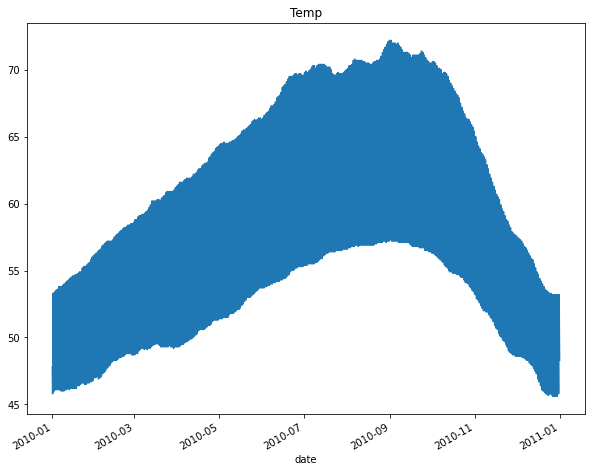

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
df.temp.plot()
plt.title('Temp')
plt.show()

# Write the code necessary to visualize the minimum temperature over time.

<Figure size 720x576 with 0 Axes>

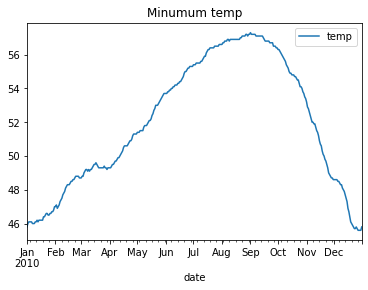

In [45]:
plt.figure(figsize=(10,8))
df.resample('D').min().plot()
plt.title('Minumum temp')
plt.show()

# Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

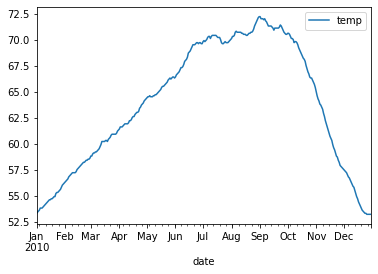

In [46]:
df.resample('D').max().plot()

# Which month is the coldest, on average?

In [47]:
#key world coldest month so we used mean instead of min cause we want the average
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

# Which month has the highest average temperature?

In [48]:
df.resample('M').max().temp.sort_values()

date
2010-01-31    56.2
2010-12-31    57.5
2010-02-28    58.6
2010-03-31    61.3
2010-04-30    64.3
2010-11-30    65.0
2010-05-31    66.4
2010-06-30    69.7
2010-07-31    70.4
2010-10-31    70.6
2010-08-31    72.2
2010-09-30    72.2
Name: temp, dtype: float64

# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [49]:
min_max_temp = df.temp.resample('D').agg(['min', 'max'])
min_max_temp

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [50]:
min_max_temp['temp_change'] = min_max_temp['max'] - min_max_temp['min']
min_max_temp.head()

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [51]:
min_max_temp.resample('M').max().temp_change.sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: temp_change, dtype: float64

# Use the dataset to answer the following questions:
 Use the dataset to answer the following questions:

Which year and month combination has the highest amount of precipitation?

Visualize the amount of monthly precipitation over time.

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

Which year-month combination is the windiest?

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?

In [52]:
from vega_datasets import data
weather_df=data.seattle_weather()
weather_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Which year and month combination has the highest amount of precipitation?

In [53]:
weather_df = weather_df.set_index('date').sort_index()

In [54]:
weather_df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [55]:
# date
# 2015-12-31    9.177419
weather_df.precipitation.resample('M').mean().tail(1)

date
2015-12-31    9.177419
Freq: M, Name: precipitation, dtype: float64

# Visualize the amount of monthly precipitation over time.

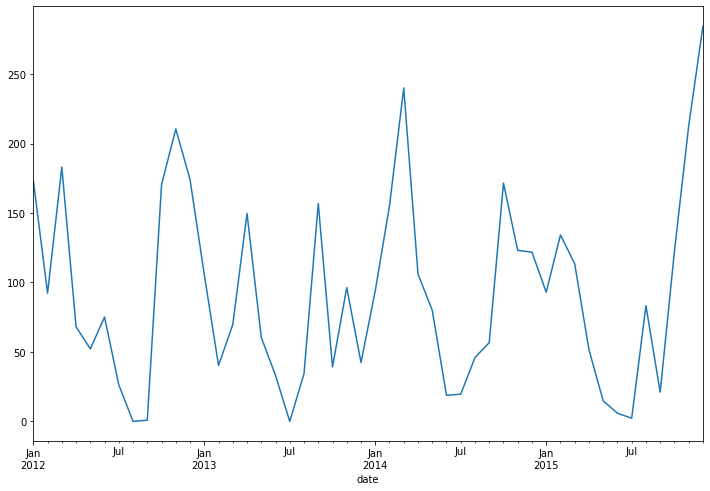

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
weather_df.resample('M').precipitation.sum().plot()
plt.show()

# Visualize the amount of wind over time. Choose a time interval you think is appropriate.

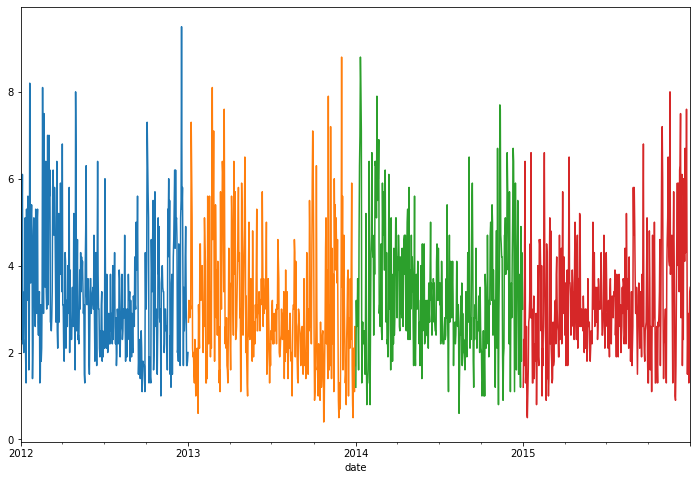

In [57]:
plt.figure(figsize=(12,8))
weather_df.resample('Y').wind.plot()
plt.show()

# Which year-month combination is the windiest?

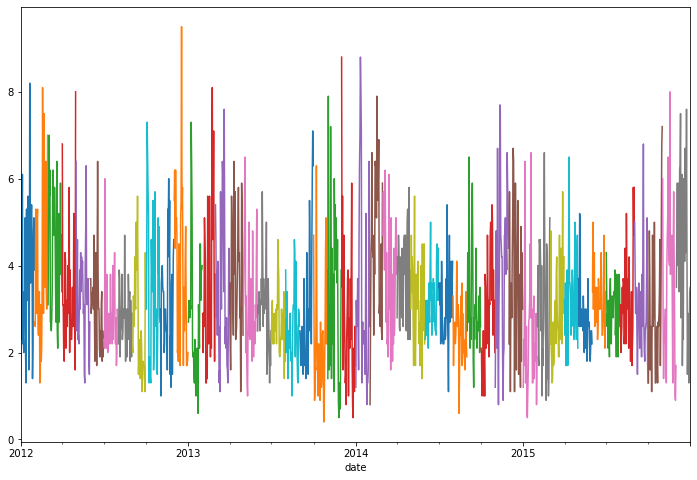

In [58]:
plt.figure(figsize=(12,8))
weather_df.resample('M').wind.plot()
plt.show()

In [59]:
#2014-02-28    4.528571
weather_df.wind.resample('M').sum().sort_values().tail(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

# What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [60]:
weather_df[weather_df.weather=='sun']

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...
2015-12-13,1.3,7.8,6.1,6.1,sun
2015-12-14,0.0,7.8,1.7,1.7,sun
2015-12-26,0.0,4.4,0.0,2.5,sun


In [61]:
weather_df['sunny']=weather_df.weather=='sun'

In [62]:
#2014-12-31    211-sunny days
weather_df.sunny.resample('Y').sum()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: sunny, dtype: int64

# In which month does it rain the most?

In [63]:
weather_df['rainning']=weather_df.weather=='rain'

In [64]:
#2012-11-30    25
weather_df.rainning.resample('M').sum().sort_values().tail(1)

date
2012-11-30    25
Name: rainning, dtype: int64

# Which month has the most number of days with a non-zero amount of precipitation?

In [65]:
weather_df['non_zero']=weather_df.precipitation>0

In [66]:
#2012-12-31    27non zero
weather_df.non_zero.resample('M').sum().sort_values().tail(1)

date
2012-12-31    27
Name: non_zero, dtype: int64

# data.flights_20k():

Convert any negative delays to 0.

Which hour of the day has the highest average delay?

Does the day of the week make a difference in the delay amount?

Does the month make a difference in the delay amount?

In [67]:
flight_df=data.flights_20k()
flight_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [68]:
flight_df = flight_df.set_index('date').sort_index()

In [69]:
flight_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


# Convert any negative delays to 0

In [70]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x
    

In [71]:
flight_df.delay = flight_df.delay.apply(delay_to_zero)

In [72]:
flight_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


# Which hour of the day has the highest average delay?

In [73]:
flight_df['hour'] = flight_df.index.hour

flight_df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [74]:
flight_df.groupby('hour').delay.mean().sort_values().tail(5)

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

# Does the day of the week make a difference in the delay amount?

In [75]:
flight_df['week_day'] = flight_df.index.day_name()

In [76]:
flight_df

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday
...,...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,21,Saturday
2001-03-31 21:05:00,0,318,FLL,JAX,21,Saturday
2001-03-31 21:05:00,0,451,MCI,IND,21,Saturday


In [77]:
flight_df.groupby('week_day').delay.mean()

week_day
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

# Does the month make a difference in the delay amount?

In [78]:
flight_df['month'] = flight_df.index.month
flight_df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

# Exercises/preparetion

The end result of this exercise should be a file named prepare.py.

Using your store items data:

Convert date column to datetime format.

Plot the distribution of sale_amount and item_price.

Set the index to be the datetime variable.

Add a 'month' and 'day of week' column to your dataframe.

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

Convert date column to datetime format.

Plot the distribution of each of your variables.

Set the index to be the datetime variable.

Add a month and a year column to your dataframe.

Fill any missing values.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [81]:
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
df = pd.concat([food_df, sales_df,stores_df],axis = 1)
df=df.reset_index(drop=True)
df.head()

,Unnamed: 0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,Unnamed: 0,index,...,sale_date,sale_id,store,Unnamed: 0,index,store_address,store_city,store_id,store_state,store_zipcode
0,0.0,0.0,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,0,0,...,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0.0,0.0,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0
1,1.0,1.0,Caress,2.0,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,1.111107e+10,1.111107e+10,1,1,...,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,1.0,1.0,9255 FM 471 West,San Antonio,2.0,TX,78251.0
2,2.0,2.0,Earths Best,3.0,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,2.392333e+10,2.392333e+10,2,2,...,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,2.0,2.0,2118 Fredericksburg Rdj,San Antonio,3.0,TX,78201.0
3,3.0,3.0,Boars Head,4.0,Boars Head Sliced White American Cheese - 120 Ct,3.14,2.085288e+11,2.085288e+11,3,3,...,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,3.0,3.0,516 S Flores St,San Antonio,4.0,TX,78204.0
4,4.0,4.0,Back To Nature,5.0,Back To Nature Gluten Free White Cheddar Rice ...,2.61,7.592831e+11,7.592831e+11,4,4,...,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,4.0,4.0,1520 Austin Hwy,San Antonio,5.0,TX,78218.0


In [98]:
df=df.drop(columns=['Unnamed: 0','index'])

In [99]:
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0
1,Caress,2.0,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,1.111107e+10,1.111107e+10,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,9255 FM 471 West,San Antonio,2.0,TX,78251.0
2,Earths Best,3.0,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,2.392333e+10,2.392333e+10,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,2118 Fredericksburg Rdj,San Antonio,3.0,TX,78201.0
3,Boars Head,4.0,Boars Head Sliced White American Cheese - 120 Ct,3.14,2.085288e+11,2.085288e+11,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,516 S Flores St,San Antonio,4.0,TX,78204.0
4,Back To Nature,5.0,Back To Nature Gluten Free White Cheddar Rice ...,2.61,7.592831e+11,7.592831e+11,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,1520 Austin Hwy,San Antonio,5.0,TX,78218.0


# Convert date column to datetime format.

In [101]:
df.sale_date = df.sale_date.apply(lambda x: x[:-13])

In [102]:
df.sale_date = pd.to_datetime(df.sale_date)

In [103]:
#sale data change format
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,1,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0
1,Caress,2.0,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,1.111107e+10,1.111107e+10,1,11.0,2013-01-02,2,1,9255 FM 471 West,San Antonio,2.0,TX,78251.0
2,Earths Best,3.0,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,2.392333e+10,2.392333e+10,1,14.0,2013-01-03,3,1,2118 Fredericksburg Rdj,San Antonio,3.0,TX,78201.0
3,Boars Head,4.0,Boars Head Sliced White American Cheese - 120 Ct,3.14,2.085288e+11,2.085288e+11,1,13.0,2013-01-04,4,1,516 S Flores St,San Antonio,4.0,TX,78204.0
4,Back To Nature,5.0,Back To Nature Gluten Free White Cheddar Rice ...,2.61,7.592831e+11,7.592831e+11,1,10.0,2013-01-05,5,1,1520 Austin Hwy,San Antonio,5.0,TX,78218.0


# Plot the distribution of sale_amount and item_price.

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

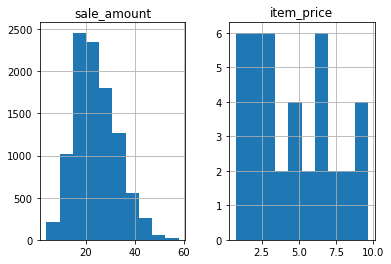

In [104]:
df[['sale_amount', 'item_price']].hist()

# Set the index to be the datetime variable.

In [106]:
df = df.set_index('sale_date').sort_index()

# Add a 'month' and 'day of week' column to your dataframe.

In [107]:
df['dow'] = df.index.day_name()

In [108]:
df['Month'] = df.index.month_name()

In [109]:
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,dow,Month
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0,Tuesday,January
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0,1827,2,NaN,NaN,NaN,NaN,NaN,Tuesday,January
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,19.0,3653,3,NaN,NaN,NaN,NaN,NaN,Tuesday,January
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,13.0,1,1,NaN,NaN,NaN,NaN,NaN,Tuesday,January
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0,1827,2,NaN,NaN,NaN,NaN,NaN,Tuesday,January


# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [110]:
df['sales_total'] = df['sale_amount'] * df['item_price']

In [115]:
df[['sales_total']].head()

,sales_total
sale_date,
2013-01-01,10.92
2013-01-01,NaN
2013-01-01,NaN
2013-01-01,NaN
2013-01-01,NaN


# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [117]:
def stores_prep(df):
    df = pd.concat([food_df, sales_df,stores_df],axis = 1)
    df=df.reset_index(drop=True)
    df=df.drop(columns=['Unnamed: 0','index'])
    df.sale_date = df.sale_date.apply(lambda x: x[:-13])
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_index()
    df['day_of_weel'] = df.index.day_name()
    df['Month'] = df.index.month_name()
    df['sales_total'] = df['sale_amount'] * df['item_price']
    return df

In [118]:
stores_prep(df)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,day_of_weel,Month,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1.0,TX,78253.0,Tuesday,January,10.92
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0,1827,2,NaN,NaN,NaN,NaN,NaN,Tuesday,January,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,19.0,3653,3,NaN,NaN,NaN,NaN,NaN,Tuesday,January,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,13.0,1,1,NaN,NaN,NaN,NaN,NaN,Tuesday,January,NaN
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0,1827,2,NaN,NaN,NaN,NaN,NaN,Tuesday,January,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,NaN,NaN,NaN,NaN,NaN,NaN,1,24.0,3651,2,NaN,NaN,NaN,NaN,NaN,Saturday,December,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,1,23.0,1826,1,NaN,NaN,NaN,NaN,NaN,Sunday,December,NaN
2017-12-31,NaN,NaN,NaN,NaN,NaN,NaN,1,23.0,1826,1,NaN,NaN,NaN,NaN,NaN,Sunday,December,NaN


# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

Convert date column to datetime format.

Plot the distribution of each of your variables.

Set the index to be the datetime variable.

Add a month and a year column to your dataframe.

Fill any missing values.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [145]:
url="https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
solar_df=pd.read_csv(url)
solar_df=solar_df.reset_index(drop=True)

In [148]:
solar_df['Date'] = pd.to_datetime(solar_df.Date)

In [149]:
solar_df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


### Convert date column to datetime format.

In [150]:
solar_df = solar_df.set_index('Date').sort_index()

### Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

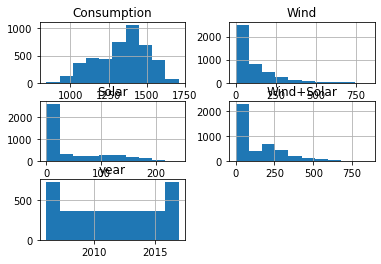

In [162]:
solar_df.hist()

### Set the index to be the datetime variable.

### Add a month and a year column to your dataframe.

In [151]:
solar_df['Month'] = solar_df.index.month_name()

In [154]:
solar_df['year'] = solar_df.index.year

### Fill any missing values.

In [156]:
solar_df = solar_df.fillna(0)

In [157]:
solar_df

,Consumption,Wind,Solar,Wind+Solar,Month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [160]:
def solar_prep(solar_df):
    url="https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
    solar_df=pd.read_csv(url)
    solar_df=solar_df.reset_index(drop=True)
    solar_df['Date'] = pd.to_datetime(solar_df.Date)
    solar_df = solar_df.set_index('Date').sort_index()
    solar_df['Month'] = solar_df.index.month_name()
    solar_df['year'] = solar_df.index.year
    solar_df = solar_df.fillna(0)
    return solar_df

In [161]:
solar_prep(solar_df)

,Consumption,Wind,Solar,Wind+Solar,Month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017
